# In this notebook, we are going to use *BeatutifulSoup* to do some web scraping. Follow me, it's very cool!

In [1]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
url = 'https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins'
data  = requests.get(url).text 

In [3]:
soup = BeautifulSoup(data, 'html5lib')

In [4]:
table = soup.find('table')
table_rows = table.find_all('tr')
# print(table_rows)

In [5]:
table_contents=[]
for i in range(1,len(table_rows)):
    row = table_rows[i].findAll('td')
    cell = {}
    cell['Borough'] = row[1].b.span.text.strip('\n')
    if i < 10:
         cell['Neighborhood'] = row[2].text.replace('0'+str(i)+'01 ','').replace('0'+str(i)+'02 ',', ').replace('0'+str(i)+'03 ',', ').replace('0'+str(i)+'04 ',', ').replace('0'+str(i)+'05 ',', ').replace('0'+str(i)+'06 ',', ').replace('0'+str(i)+'07 ',', ').replace('0'+str(i)+'08 ',', ').replace('0'+str(i)+'09 ',', ').replace('0'+str(i)+'10 ',', ').replace('0'+str(i)+'11 ',', ').replace('0'+str(i)+'12 ',', ').replace('0'+str(i)+'13 ',', ').replace('0'+str(i)+'14 ',', ').replace('0'+str(i)+'15 ',', ').strip('\n')
    else:
         cell['Neighborhood'] = row[2].text.replace(str(i)+'01 ','').replace(str(i)+'02 ',', ').replace(str(i)+'03 ',', ').replace(str(i)+'04 ',', ').replace(str(i)+'05 ',', ').replace(str(i)+'06 ',', ').replace(str(i)+'07 ',', ').replace(str(i)+'08 ',', ').replace(str(i)+'09 ',', ').replace(str(i)+'10 ',', ').replace(str(i)+'11 ',', ').replace(str(i)+'12 ',', ').replace(str(i)+'13 ',', ').replace(str(i)+'14 ',', ').replace(str(i)+'15 ',', ').strip('\n')
    cell['Area'] = row[3].text.strip('\n').replace(',', '')
    cell['Population'] = row[4].text.strip('\n').replace(',', '')
    cell['Density'] = row[5].text.strip('\n').replace(',', '')
    table_contents.append(cell)

# print(table_contents)
df = pd.DataFrame(table_contents)
df[['Population','Area','Density']] = df[['Population','Area','Density']].astype(float)
df

,Borough,Neighborhood,Area,Population,Density
0,Mitte,"Mitte, Moabit, Hansaviertel, Tiergarten, Weddi...",3947.0,385.748,9.773
1,Friedrichshain-Kreuzberg,"Friedrichshain, Kreuzberg",2016.0,290.386,14.404
2,Pankow,"Prenzlauer Berg, Weißensee, Blankenburg, Heine...",10301.0,409.335,3.974
3,Charlottenburg-Wilmersdorf,"Charlottenburg, Wilmersdorf, Schmargendorf, Gr...",6472.0,343.592,5.309
4,Spandau,"Spandau, Haselhorst, Siemensstadt, Staaken, Ga...",9191.0,245.197,2.668
5,Steglitz-Zehlendorf,"Steglitz, Lichterfelde, Lankwitz, Zehlendorf, ...",10250.0,310.071,3.025
6,Tempelhof-Schöneberg,"Schöneberg, Friedenau, Tempelhof, Mariendorf, ...",5309.0,350.984,6.611
7,Neukölln,"Neukölln, Britz, Buckow, Rudow, Gropiusstadt",4493.0,329.917,7.343
8,Treptow-Köpenick,"Alt-Treptow, Plänterwald, Baumschulenweg, Joha...",16842.0,273.689,1.625
9,Marzahn-Hellersdorf,"Marzahn, Biesdorf, Kaulsdorf, Mahlsdorf, Helle...",6174.0,269.967,4.373


In [6]:
Berlin = df['Borough'].to_frame()
Berlin = Berlin.append({'Borough':'Berlin'},ignore_index=True)
Berlin

,Borough
0,Mitte
1,Friedrichshain-Kreuzberg
2,Pankow
3,Charlottenburg-Wilmersdorf
4,Spandau
5,Steglitz-Zehlendorf
6,Tempelhof-Schöneberg
7,Neukölln
8,Treptow-Köpenick
9,Marzahn-Hellersdorf


In [7]:
Berlin = Berlin.values.tolist()

In [8]:
flat = []
for i in range(0,len(Berlin)):
      flat += Berlin[i] 
Berlin = flat
Berlin

['Mitte',
 'Friedrichshain-Kreuzberg',
 'Pankow',
 'Charlottenburg-Wilmersdorf',
 'Spandau',
 'Steglitz-Zehlendorf',
 'Tempelhof-Schöneberg',
 'Neukölln',
 'Treptow-Köpenick',
 'Marzahn-Hellersdorf',
 'Lichtenberg',
 'Reinickendorf',
 'Berlin']

In [9]:
Berlin_Mieten = pd.DataFrame([[13.70, 13.11, 10.50, 12.38, 8.53, 10.31, 9.97, 9.38, 10.19, 8.02, 9.08, 8.84, 10.14],
                      [13.45, 13.01, 10.96, 12.63, 8.86, 10.70, 10.52, 10.10, 9.93, 7.90, 9.27, 9.42, 10.45],
                      [12.51, 12.94, 10.97, 12.00, 8.59, 10.44, 10.30, 10.00, 9.62, 7.77, 9.53, 9.17, 10.32],
                      [12.77, 12.50, 10.86, 11.86, 7.95, 10.00, 9.97, 10.00, 9.16, 7.16, 9.72, 8.73, 10.15],
                      [10.51, 11.50, 9.99, 10.53, 7.35, 9.38, 9.00, 9.00, 8.24, 6.51, 8.80, 8.00, 9.07],
                      [10.06, 10.99, 9.45, 10.00, 6.99, 8.87, 8.50, 8.57, 7.81, 5.76, 8.10, 7.50, 8.80],
                      [9.36, 9.98, 8.99, 9.49, 6.58, 8.50, 8.01, 7.73, 7.12, 5.80, 7.50, 6.92, 8.25],
                      [9.39, 9.64, 8.56, 9.86, 6.48, 8.50, 8.00, 7.33, 7.08, 5.55, 7.01, 6.86, 8.05],
                      [8.03, 8.61, 8.00, 8.93, 5.93, 7.99, 7.49, 6.70, 6.55, 5.08, 6.53, 6.31, 7.40],
                      [6.18, 7.00, 6.73, 7.53, 5.28, 6.88, 6.23, 5.57, 5.80, 4.85, 5.65, 5.49, 6.17],
                      [5.37, 6.42, 6.13, 6.56, 5.26, 6.29, 5.84, 5.19, 5.55, 4.86, 5.51, 5.26, 5.82]],
                      columns=Berlin)
Berlin_Mieten['Year'] = [2020-i for i in range(0,9)]+[2010,2009]
new_columns = ['Year'] + Berlin
Berlin_Mieten = Berlin_Mieten[new_columns].sort_values(['Year'],ascending=True).reset_index(drop=True)
Berlin_Mieten

,Year,Mitte,Friedrichshain-Kreuzberg,Pankow,Charlottenburg-Wilmersdorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Neukölln,Treptow-Köpenick,Marzahn-Hellersdorf,Lichtenberg,Reinickendorf,Berlin
0,2009,5.37,6.42,6.13,6.56,5.26,6.29,5.84,5.19,5.55,4.86,5.51,5.26,5.82
1,2010,6.18,7.00,6.73,7.53,5.28,6.88,6.23,5.57,5.80,4.85,5.65,5.49,6.17
2,2012,8.03,8.61,8.00,8.93,5.93,7.99,7.49,6.70,6.55,5.08,6.53,6.31,7.40
3,2013,9.39,9.64,8.56,9.86,6.48,8.50,8.00,7.33,7.08,5.55,7.01,6.86,8.05
4,2014,9.36,9.98,8.99,9.49,6.58,8.50,8.01,7.73,7.12,5.80,7.50,6.92,8.25
5,2015,10.06,10.99,9.45,10.00,6.99,8.87,8.50,8.57,7.81,5.76,8.10,7.50,8.80
6,2016,10.51,11.50,9.99,10.53,7.35,9.38,9.00,9.00,8.24,6.51,8.80,8.00,9.07
7,2017,12.77,12.50,10.86,11.86,7.95,10.00,9.97,10.00,9.16,7.16,9.72,8.73,10.15
8,2018,12.51,12.94,10.97,12.00,8.59,10.44,10.30,10.00,9.62,7.77,9.53,9.17,10.32
9,2019,13.45,13.01,10.96,12.63,8.86,10.70,10.52,10.10,9.93,7.90,9.27,9.42,10.45


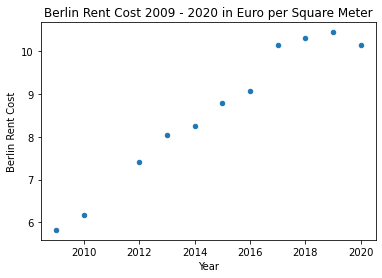

In [10]:
fig = Berlin_Mieten.plot(kind='scatter', x='Year', y='Berlin')
fig.set_title('Berlin Rent Cost 2009 - 2020 in Euro per Square Meter')
fig.set_xlabel('Year')
fig.set_ylabel('Berlin Rent Cost')
plt.show()

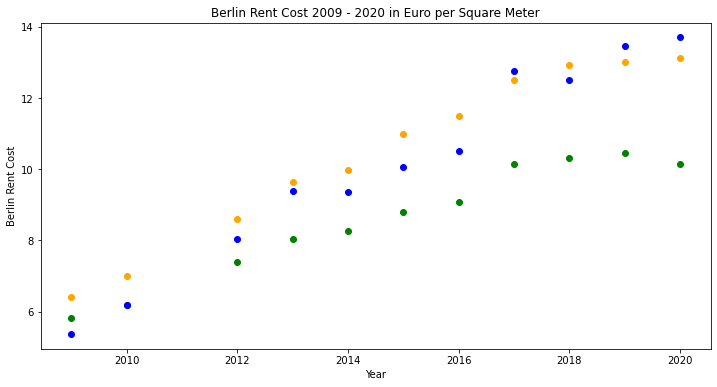

In [11]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten['Year'], Berlin_Mieten["Berlin"],  color='green')
plt.scatter(Berlin_Mieten['Year'], Berlin_Mieten["Mitte"],  color='blue')
plt.scatter(Berlin_Mieten['Year'], Berlin_Mieten["Friedrichshain-Kreuzberg"],  color='orange')
plt.title('Berlin Rent Cost 2009 - 2020 in Euro per Square Meter')
plt.xlabel('Year')
plt.ylabel('Berlin Rent Cost')
plt.show()

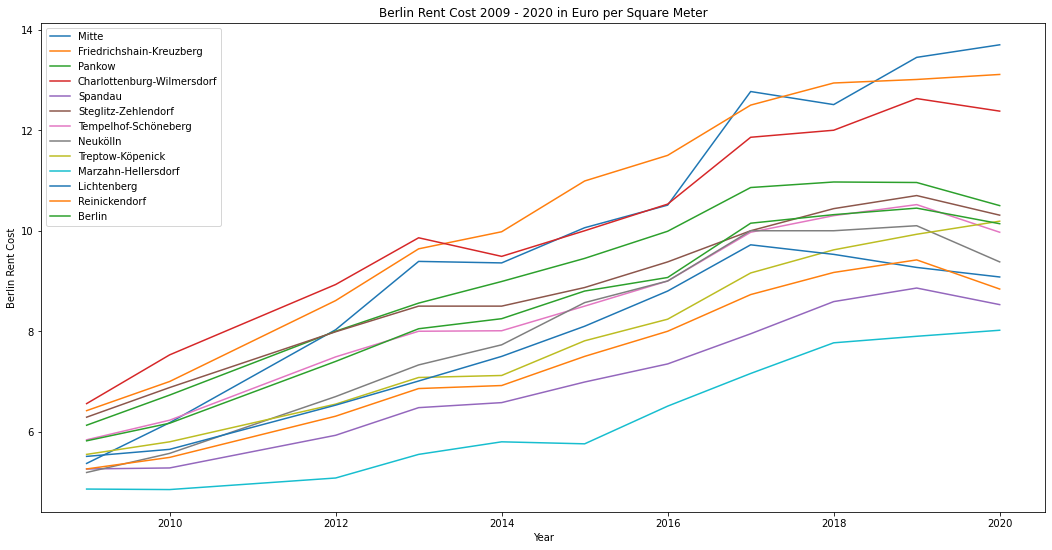

In [12]:
plt.figure(figsize = (18,9))
plt.plot(Berlin_Mieten['Year'], Berlin_Mieten[Berlin])
plt.title('Berlin Rent Cost 2009 - 2020 in Euro per Square Meter')
plt.xlabel('Year')
plt.ylabel('Berlin Rent Cost')
plt.legend(Berlin)
plt.show()

In [13]:
from sklearn import linear_model
x = np.asanyarray(Berlin_Mieten[['Year']])
y_B = np.asanyarray(Berlin_Mieten[['Berlin']])
y_M = np.asanyarray(Berlin_Mieten[['Mitte']])
y_FK = np.asanyarray(Berlin_Mieten[['Friedrichshain-Kreuzberg']])
regr_Berlin = linear_model.LinearRegression().fit (x, y_B)
regr_Mitte = linear_model.LinearRegression().fit (x, y_M)
regr_FK = linear_model.LinearRegression().fit (x, y_FK)

# The coefficients
print ('Coefficients: ', regr_Berlin.coef_)
print ('Intercept: ',regr_Berlin.intercept_)

Coefficients:  [[0.44519635]]
Intercept:  [-888.3878892]


Text(0, 0.5, 'Berlin Rent')

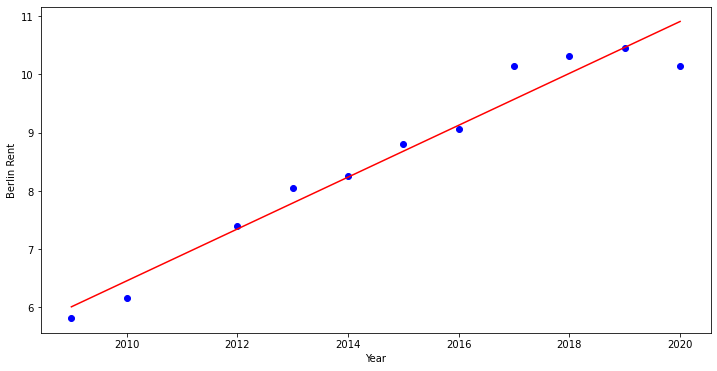

In [14]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten.Year, Berlin_Mieten.Berlin,  color='blue')
plt.plot(x, regr_Berlin.coef_[0][0]*x + regr_Berlin.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Berlin Rent")

Text(0, 0.5, 'Berlin-Mitte Rent')

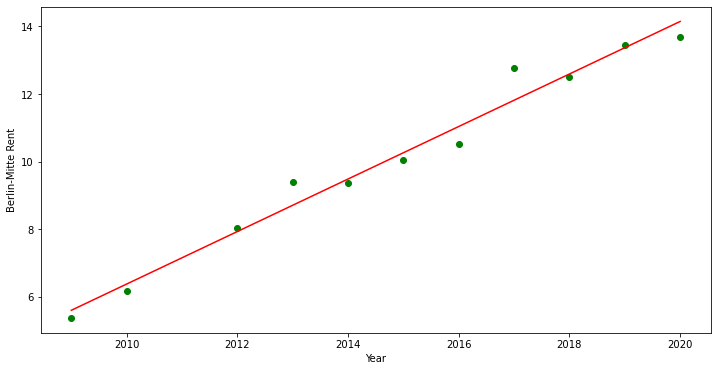

In [15]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten.Year, Berlin_Mieten.Mitte,  color='green')
plt.plot(x, regr_Mitte.coef_[0][0]*x + regr_Mitte.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Berlin-Mitte Rent")

Text(0, 0.5, 'Berlin-Friedrichshain-Kreuzberg Rent')

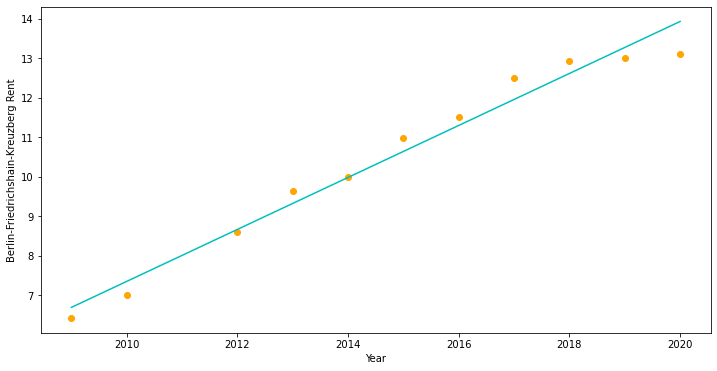

In [16]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten.Year, Berlin_Mieten['Friedrichshain-Kreuzberg'],  color='orange')
plt.plot(x, regr_FK.coef_[0][0]*x + regr_FK.intercept_[0], '-c')
plt.xlabel("Year")
plt.ylabel("Berlin-Friedrichshain-Kreuzberg Rent")

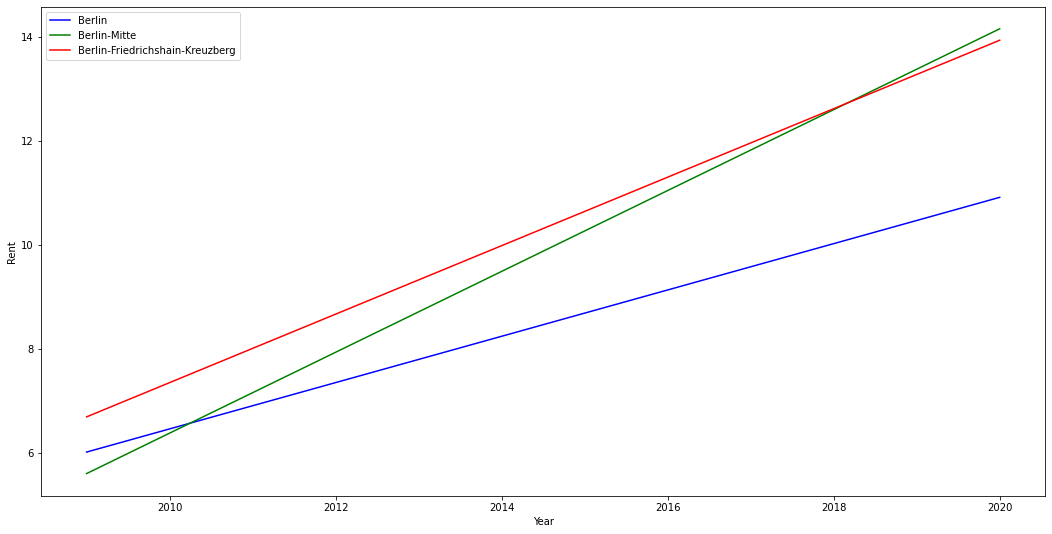

In [17]:
plt.figure(figsize = (18,9))
plt.plot(x, regr_Berlin.coef_[0][0]*x + regr_Berlin.intercept_[0], '-b', label='Berlin')
plt.plot(x, regr_Mitte.coef_[0][0]*x + regr_Mitte.intercept_[0], '-g', label='Berlin-Mitte')
plt.plot(x, regr_FK.coef_[0][0]*x + regr_FK.intercept_[0], '-r', label='Berlin-Friedrichshain-Kreuzberg')
plt.xlabel("Year")
plt.ylabel("Rent")
plt.legend()
plt.show()

In [18]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [19]:
geolocator = Nominatim(user_agent="ny_explorer")
Position = []
for i in range(0,len(Berlin)):
                 location = geolocator.geocode(Berlin[i]+', Berlin')
                 latitude = location.latitude
                 longitude = location.longitude
                 Position.append({'Borough':Berlin[i], 'Latitude':latitude, 'Longitude':longitude})
Position = pd.DataFrame(Position)
Position

,Borough,Latitude,Longitude
0,Mitte,52.517885,13.404060
1,Friedrichshain-Kreuzberg,52.501115,13.444285
2,Pankow,52.597917,13.435316
3,Charlottenburg-Wilmersdorf,52.507856,13.263952
4,Spandau,52.535788,13.197792
5,Steglitz-Zehlendorf,52.429205,13.229974
6,Tempelhof-Schöneberg,52.440603,13.373703
7,Neukölln,52.481150,13.435350
8,Treptow-Köpenick,52.417893,13.600185
9,Marzahn-Hellersdorf,52.522523,13.587663


In [20]:
!pip install folium
import folium # map rendering library
# create map of Toronto using latitude and longitude values
map_berlin = folium.Map(location=Position.iloc[12,[1,2]], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(Position['Latitude'], Position['Longitude'], Position['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    if borough == 'Berlin':
           c = 'red'
    else:
           c = 'blue'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

In [21]:
df = df.join(Position.drop(index=12).set_index('Borough'), on='Borough', how='right')
df 

,Borough,Neighborhood,Area,Population,Density,Latitude,Longitude
0,Mitte,"Mitte, Moabit, Hansaviertel, Tiergarten, Weddi...",3947.0,385.748,9.773,52.517885,13.404060
1,Friedrichshain-Kreuzberg,"Friedrichshain, Kreuzberg",2016.0,290.386,14.404,52.501115,13.444285
2,Pankow,"Prenzlauer Berg, Weißensee, Blankenburg, Heine...",10301.0,409.335,3.974,52.597917,13.435316
3,Charlottenburg-Wilmersdorf,"Charlottenburg, Wilmersdorf, Schmargendorf, Gr...",6472.0,343.592,5.309,52.507856,13.263952
4,Spandau,"Spandau, Haselhorst, Siemensstadt, Staaken, Ga...",9191.0,245.197,2.668,52.535788,13.197792
5,Steglitz-Zehlendorf,"Steglitz, Lichterfelde, Lankwitz, Zehlendorf, ...",10250.0,310.071,3.025,52.429205,13.229974
6,Tempelhof-Schöneberg,"Schöneberg, Friedenau, Tempelhof, Mariendorf, ...",5309.0,350.984,6.611,52.440603,13.373703
7,Neukölln,"Neukölln, Britz, Buckow, Rudow, Gropiusstadt",4493.0,329.917,7.343,52.481150,13.435350
8,Treptow-Köpenick,"Alt-Treptow, Plänterwald, Baumschulenweg, Joha...",16842.0,273.689,1.625,52.417893,13.600185
9,Marzahn-Hellersdorf,"Marzahn, Biesdorf, Kaulsdorf, Mahlsdorf, Helle...",6174.0,269.967,4.373,52.522523,13.587663


In [22]:
Mitte = list(map(str.strip,df.loc[0,'Neighborhood'].split(',')))
Mitte

['Mitte', 'Moabit', 'Hansaviertel', 'Tiergarten', 'Wedding', 'Gesundbrunnen']

In [23]:
Friedrichshain_Kreuzberg = list(map(str.strip,df.loc[1,'Neighborhood'].split(',')))
Friedrichshain_Kreuzberg

['Friedrichshain', 'Kreuzberg']

In [24]:
Charlottenburg_Wilmersdorf = list(map(str.strip,df.loc[3,'Neighborhood'].split(',')))
Charlottenburg_Wilmersdorf

['Charlottenburg',
 'Wilmersdorf',
 'Schmargendorf',
 'Grunewald',
 'Westend',
 'Charlottenburg-Nord',
 'Halensee']

In [46]:
Data = []
for x in Mitte+Friedrichshain_Kreuzberg+Charlottenburg_Wilmersdorf:
    if x in Mitte:
        address = x + ', Mitte, Berlin, Germany'
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        Data.append({'Borough':'Mitte', 'Neighborhood':x, 'Latitude':latitude, 'Longitude':longitude})
    elif x in Friedrichshain_Kreuzberg:
        address = x + ', Berlin, Germany'
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        Data.append({'Borough':'Friedrichshain_Kreuzberg', 'Neighborhood':x, 'Latitude':latitude, 'Longitude':longitude}) 
    else:
        address = x + ', Berlin, Germany'
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        Data.append({'Borough':'Charlottenburg_Wilmersdorf', 'Neighborhood':x, 'Latitude':latitude, 'Longitude':longitude}) 

Berlin_Ortsteil = pd.DataFrame(Data)
Berlin_Ortsteil        

,Borough,Neighborhood,Latitude,Longitude
0,Mitte,Mitte,52.517885,13.404060
1,Mitte,Moabit,52.530102,13.342542
2,Mitte,Hansaviertel,52.519123,13.341872
3,Mitte,Tiergarten,52.509778,13.357260
4,Mitte,Wedding,52.550123,13.341970
5,Mitte,Gesundbrunnen,52.550920,13.384846
6,Friedrichshain_Kreuzberg,Friedrichshain,52.512215,13.450290
7,Friedrichshain_Kreuzberg,Kreuzberg,52.497644,13.411914
8,Charlottenburg_Wilmersdorf,Charlottenburg,52.515747,13.309683
9,Charlottenburg_Wilmersdorf,Wilmersdorf,52.487115,13.320330


In [26]:
map_berlin = folium.Map(location=Position.iloc[12,[1,2]], zoom_start=10)

# add markers to map
for lat, lng, ortsteil in zip(Berlin_Ortsteil['Latitude'], Berlin_Ortsteil['Longitude'], Berlin_Ortsteil['Neighborhood']):
    label = '{}'.format(ortsteil)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

In [27]:
CLIENT_ID = '1DPGMGDNDTEIRPC4BNO30MK5BFIQ5LLE4TEOK0EJHSUFNPHG' # your Foursquare ID
CLIENT_SECRET = '5MZHZLG15KWWO5NNE4XXFVFNXW51KWH1UK0UNKQ4MLKYRZGN' # your Foursquare Secret
VERSION = '20210505' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
nearby_venues = getNearbyVenues(names=Berlin_Ortsteil['Neighborhood'],
                                   latitudes=Berlin_Ortsteil['Latitude'],
                                   longitudes=Berlin_Ortsteil['Longitude']
                                  )

Mitte
Moabit
Hansaviertel
Tiergarten
Wedding
Gesundbrunnen
Friedrichshain
Kreuzberg
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord
Halensee


In [30]:
print('There are {} different venue categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 240 different venue categories.


In [31]:
nearby_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.517885,13.40406,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",52.516290,13.405558,Outdoor Sculpture
1,Mitte,52.517885,13.40406,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum
2,Mitte,52.517885,13.40406,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
3,Mitte,52.517885,13.40406,Lustgarten,52.518469,13.399454,Garden
4,Mitte,52.517885,13.40406,Tigertörtchen,52.517150,13.407926,Cupcake Shop


In [32]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = nearby_venues[['Venue Latitude','Venue Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
nearby_venues["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
nearby_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Clus_Db
0,Mitte,52.517885,13.40406,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",52.516290,13.405558,Outdoor Sculpture,0
1,Mitte,52.517885,13.40406,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum,0
2,Mitte,52.517885,13.40406,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout,0
3,Mitte,52.517885,13.40406,Lustgarten,52.518469,13.399454,Garden,0
4,Mitte,52.517885,13.40406,Tigertörtchen,52.517150,13.407926,Cupcake Shop,0


In [54]:
nearby_venues['Clus_Db'].unique()
set(labels)

{0, 1, 2, 3, 4, 5}

In [57]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


map_berlin = folium.Map(location=Position.iloc[12,[1,2]], zoom_start=10)


# Visualization1
for clust_number in set(labels):
    clust_set = nearby_venues[nearby_venues.Clus_Db == clust_number] 
    
# Set color for the nodes
    x = np.arange(len(set(labels)))
    ys = [i + x + (i*x)**2 for i in range(len(set(labels)))]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]
    if clust_number != -1:
        cenx=np.mean(clust_set['Venue Latitude']) 
        ceny=np.mean(clust_set['Venue Longitude']) 
        print ("Cluster "+str(clust_number)+', Position: '+ str(cenx) + ', ' + str(ceny))
 
        for x,y in zip(clust_set['Venue Latitude'], clust_set['Venue Longitude']):
                     label = '{}, Cluster {}'.format(clust_set.Neighborhood.unique()[0], clust_number)
                     label = folium.Popup(label, parse_html=True)
                     folium.CircleMarker(
                         [x, y],
                         radius=3,
                         popup=label,
                         color=rainbow[clust_number-1],
                         fill=True,
                         fill_color='#cc3131',
                         fill_opacity=1.7,
                         parse_html=False).add_to(map_berlin)  
                    
        label = '{}, Cluster {}'.format(clust_set.Neighborhood.unique()[0], clust_number)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
                [cenx, ceny],
                radius=3,
                popup=label,
                color='black',
                fill=True,
                fill_color='#cc3131',
                fill_opacity=1.7,
                parse_html=False).add_to(map_berlin) 
        
map_berlin

Cluster 0, Position: 52.52023778008823, 13.403630365844045
Cluster 1, Position: 52.52448275331945, 13.34161372176946
Cluster 2, Position: 52.50534736656624, 13.35644654519308
Cluster 3, Position: 52.55088738406587, 13.349872070406837
Cluster 4, Position: 52.551052989963644, 13.383308648779456
Cluster 5, Position: 52.51129096239839, 13.454255543582882


In [42]:
# one hot encoding
hotspots = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")
print(hotspots.columns.get_loc("Neighborhood"))

# add neighborhood column back to dataframe
hotspots['Neighborhoods'] = nearby_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hotspots.columns[-1]] + list(hotspots.columns[:-1])
hotspots = hotspots[fixed_columns]

hotspots.head(10)

146


,Neighborhoods,ATM,Adult Boutique,African Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yemeni Restaurant,Yoga Studio,Zoo Exhibit
0,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
grouped_hotspots = hotspots.groupby('Neighborhoods').mean().reset_index()
grouped_hotspots

,Neighborhoods,ATM,Adult Boutique,African Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yemeni Restaurant,Yoga Studio,Zoo Exhibit
0,Charlottenburg,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.00,0.020000,0.000000,...,0.000000,0.000000,0.020000,0.00,0.000000,0.01,0.010000,0.000000,0.00,0.00
1,Charlottenburg-Nord,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00
2,Friedrichshain,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.030000,0.000000,0.010000,0.00,0.000000,0.00,0.010000,0.000000,0.00,0.00
3,Gesundbrunnen,0.000000,0.00,0.000000,0.000000,0.011364,0.000000,0.00,0.011364,0.000000,...,0.011364,0.000000,0.000000,0.00,0.011364,0.00,0.011364,0.000000,0.00,0.00
4,Grunewald,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.034483,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00
5,Halensee,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,...,0.010000,0.000000,0.010000,0.00,0.000000,0.00,0.010000,0.000000,0.00,0.00
6,Hansaviertel,0.000000,0.00,0.000000,0.000000,0.000000,0.020000,0.01,0.010000,0.000000,...,0.000000,0.000000,0.030000,0.02,0.000000,0.00,0.000000,0.000000,0.00,0.00
7,Kreuzberg,0.000000,0.00,0.010000,0.000000,0.030000,0.000000,0.01,0.000000,0.000000,...,0.010000,0.000000,0.000000,0.02,0.000000,0.03,0.010000,0.000000,0.02,0.00
8,Mitte,0.000000,0.01,0.000000,0.000000,0.050000,0.020000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.010000,0.00,0.000000,0.00,0.010000,0.000000,0.00,0.00
9,Moabit,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0.00,0.010000,0.000000,...,0.020000,0.000000,0.030000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00


In [47]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 6

grouped_clustering = grouped_hotspots.drop('Neighborhoods', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

labels = kmeans.labels_
grouped_hotspots["Cluster Labels"]=labels

# check cluster labels generated for each row in the dataframe
Berlin_Ortsteil = Berlin_Ortsteil.join(grouped_hotspots[['Neighborhoods','Cluster Labels']].set_index('Neighborhoods'), on='Neighborhood')
Berlin_Ortsteil

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Mitte,Mitte,52.517885,13.404060,1
1,Mitte,Moabit,52.530102,13.342542,2
2,Mitte,Hansaviertel,52.519123,13.341872,2
3,Mitte,Tiergarten,52.509778,13.357260,1
4,Mitte,Wedding,52.550123,13.341970,0
5,Mitte,Gesundbrunnen,52.550920,13.384846,2
6,Friedrichshain_Kreuzberg,Friedrichshain,52.512215,13.450290,3
7,Friedrichshain_Kreuzberg,Kreuzberg,52.497644,13.411914,3
8,Charlottenburg_Wilmersdorf,Charlottenburg,52.515747,13.309683,0
9,Charlottenburg_Wilmersdorf,Wilmersdorf,52.487115,13.320330,2


In [48]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Berlin_Ortsteil['Latitude'], Berlin_Ortsteil['Longitude'], Berlin_Ortsteil['Neighborhood'], Berlin_Ortsteil['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = grouped_hotspots['Neighborhoods']

for ind in np.arange(grouped_hotspots.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_hotspots.drop("Cluster Labels",axis=1).iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg,Café,Italian Restaurant,Chinese Restaurant,Gym / Fitness Center,Sushi Restaurant,Supermarket,German Restaurant,Pizza Place,Coffee Shop,Asian Restaurant
1,Charlottenburg-Nord,Intersection,Supermarket,Metro Station,Post Office,Beer Garden,Pizza Place,Dog Run,Rock Climbing Spot,Persian Restaurant,Park
2,Friedrichshain,Café,Coffee Shop,Ice Cream Shop,Falafel Restaurant,Middle Eastern Restaurant,Nightclub,Thai Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Pub
3,Gesundbrunnen,Bar,Café,Coffee Shop,Turkish Restaurant,Bakery,Doner Restaurant,Drugstore,Trail,Breakfast Spot,Supermarket
4,Grunewald,German Restaurant,Lake,Supermarket,Italian Restaurant,Café,Hotel,Light Rail Station,Plaza,Train Station,Historic Site
5,Halensee,Italian Restaurant,Hotel,Café,Trattoria/Osteria,Plaza,Supermarket,Ice Cream Shop,Bar,Bakery,German Restaurant
6,Hansaviertel,Hotel,Café,Italian Restaurant,Burger Joint,Park,Vietnamese Restaurant,Restaurant,Beer Garden,Doner Restaurant,Indian Restaurant
7,Kreuzberg,Coffee Shop,Café,German Restaurant,Bar,Wine Bar,Art Gallery,Dance Studio,Ice Cream Shop,Middle Eastern Restaurant,Record Shop
8,Mitte,Hotel,Art Gallery,Coffee Shop,Plaza,History Museum,Exhibit,Café,Clothing Store,Indie Movie Theater,Restaurant
9,Moabit,Café,Bar,Burger Joint,Turkish Restaurant,Doner Restaurant,Italian Restaurant,Drugstore,Restaurant,Cocktail Bar,Breakfast Spot


In [72]:
latitude1 = Berlin_Ortsteil[Berlin_Ortsteil['Neighborhood'] == 'Mitte'].values[0][2]
longitude1 = Berlin_Ortsteil[Berlin_Ortsteil['Neighborhood'] == 'Mitte'].values[0][3]
latitude2 = Berlin_Ortsteil[Berlin_Ortsteil['Neighborhood'] == 'Tiergarten'].values[0][2]
longitude2 = Berlin_Ortsteil[Berlin_Ortsteil['Neighborhood'] == 'Tiergarten'].values[0][3]

In [73]:
# define URL
url1 = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION)
url2 = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION)
# send GET request and get trending venues
results1 = requests.get(url1).json()
results2 = requests.get(url2).json()
print(results1, end='\n')
print(results2)

{'meta': {'code': 200, 'requestId': '60a344d17d9b925ff4f79033'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60a344d126ea963035a057dc'}, 'response': {'venues': []}}
